# Simulating data

## __<font color=blue>Tools</font>__
---

During these exercises, we will learn some general Python and biochemistry tools:

 - $A$ $\rightarrow$ $B$
      - applying numerical integration methods to calculate the change in concentration of $A$ and $B$ with time
 - $A + B$ $\rightleftharpoons$ $AB$
      - applying numerical integration methods to calculate the change in concentration of $A$, $B$, and $AB$ with time
 - $E + S$ $\rightleftharpoons$ $ES$ $\rightarrow$ $E + P$
      - applying numerical integration methods to calculate the change in concentration of $E$, $S$, $ES$, and $P$ with time

## __<font color=blue>Why?</font>__
---

This taster session applies numerical integration methods to ordinary differential equations to calculate the change in concentrations for simple biochemical reactions. The same mathematical modeling can be used for biochemical pathways and networks to help us understand how _e.g._ environmental stimuli induce various phenotypes via sequences of biochemical reactions and time-varying concentrations of biomolecular species.

Interested? Have a look at:
Aldridge, B., Burke, J., Lauffenburger, D. et al. Physicochemical modelling of cell signalling pathways. Nat Cell Biol 8, 1195–1203 (2006). [https://doi.org/10.1038/ncb1497](https://doi.org/10.1038/ncb1497)

## __<font color=blue>Convention</font>__
---

We will use the convention that $[A]$ is the concentration of free $A$, $[A]_0$ is the initial (or total) concentration of $A$ before any binding or conversion occurs, and $[A]_{eq}$ is the concentration of $A$ at equilibrium.

## __<font color=blue>Import libraries</font>__
---

Before we start, we need to `import` the correct libraries, _i.e._ NumPy, Matplotlib, pandas, and the `odeint` and `curve_fit` functions from SciPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint 
from scipy.optimize import curve_fit

## __<font color=blue>$A$ $\rightarrow$ $B$</font>__
---

### _Background_

In the following, simple mechanism, $A$ is the reactant and $B$ is the product:

$$
A \xrightarrow{\text{$k_f$}} B .
$$

This __<font color=red>irreversible first-order reaction</font>__ is a reaction that proceeds at __<font color=red>a reaction rate, $v$ $(M s^{-1})$</font>__, which depends linearly on only one reactant concentration. Here, the rate of disappearance of $A$ is proportional to the concentration of $A$ itself. __<font color=red>The forward rate constant, $k_f$ $(s^{-1})$</font>__, is the proportionality constant that relates the observed reaction rate to concentration. This can be written as:

$$
v = -\frac{d [A]}{dt} = k_f[A] .
$$

This is __<font color=red>an ordinary differential equation (ODE)</font>__. We want to find how the concentration of $A$ depends on the time $t$ (independent variable). We can solve this ODE analytically or numerically.

Solving this equation __analytically__ shows an exponential decay defined by  

$$
\int_{[A]_0}^{[A]} \frac{d{[A]}}{[A]} = \int_0^t -k_{f}dt .
$$

$$
ln[A] - ln[A]_0 = -k_{f}t .
$$

$$
[A] = [A]_0e^{-k_{f}t} .
$$

and because $[B]$ = $[A]_0$ - $[A]$:

$$
[B] = [A]_0(1-e^{-k_{f}t}) .
$$

The rate constant can be estimated from the relationship

$$
k_f = \frac{ln2}{t_{1/2}} ,
$$

where __<font color=red>the half life or half time, $t_{1/2}$</font>__, is the time for $[A]_0$ to decrease by 50 %. In molecular terms $t_{1/2}$ represents the time in which there is a 50 % probability that a molecule $A$ will be converted to $B$. Those molecules which have not converted in this time will still have a 50 % probability of converting - so the population will fall from 100 % to 50 % to 25 % to 12.5 % to 6.25 % to … for each half time period.

To solve this ODE __numerically__, we simply take a small but finite time interval $\Delta$$t = t_2 - t_1$ and calculate the finite change in $[A]$. In Python, we can do this using the `odeint` function of the SciPy package. Briefly, `odeint` requires four main parameters: `odeint(model, y0, t, args=)`, with

- model: a function that returns derivative values at requested y and t values: dydt = model(y, t) 
- y0: the initial conditions of the y states
- t: the time points for which the solutions need to be reported
- args: when the model function depends on variables other than y and t, these can be passed in a tuple. Of note, a tuple consists of a number of values separated by commas. It is different from a list as a tuple is a collection which is ordered and unchangeable. For more information, see [here](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences).

See also the `odeint` documentation, available [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

### _Simulation_

We start be defining a function that returns $\frac{d[A]}{dt}$ and $\frac{d[B]}{dt}$. The input for our function will be a list with initial concentrations ($C = \{[A_0], [B_0]\}$, all in $mM$), time points for which values of the variables should be returned ($t$ in $s$), and the rate constant ($k_{f}$ in $s^{-1}$).

In [3]:
def funcAtoB(C, t, kf):   #create the function
    """
    Define a function for A -> B 

    Args:
        C, the concentrations of A and B (float) in mol/L
        t, the time (float) in s
        kf, the forward rate constant (float) in 1/s

    Returns:
        dC/dt, derivative values (float) in (mol/L)/s
    """
    CA = C[0]   #the initial concentration of A is the first element from the list C
    CB = C[1]   #the initial concentration of B is the second element from the list C
    
    dAdt = -kf * CA   #rate equation for [A]
    dBdt = +kf * CA   #rate equation for [B]
    
    return [dAdt, dBdt]

We then provide the initial concentrations, time points, and a rate constant. We use the following parameters:
- initial concentration of $A$: $[A]_0 = 100$ $mM$
- initial concentration of $B$: $[B]_0 = 0$ $mM$
- rate constant: $k_f = 7$ $s^{-1}$
- time points: 1000 points between $0$ and $2 s$, generated using `numpy.linspace(start, stop, num)`.

In [4]:
CAtoB = [100, 0]   #y0 - initial conditions

tAtoB = np.linspace(0, 2, 1000)   #t - time points, an array with 1000 evenly distributed elements between 0 (included) and 2 (included)

kfAtoB = (7,)   #args - rate constant. Of note, a tuple with one item is constructed by following a value with a comma!

We can now solve the ODE for each time point:

In [5]:
yAtoB = odeint(funcAtoB, CAtoB, tAtoB, kfAtoB)   #solve ODE - odeint(model, y0, t, args=)
print(yAtoB)   #print the outcome

[[1.00000000e+02 0.00000000e+00]
 [9.86083725e+01 1.39162750e+00]
 [9.72361113e+01 2.76388871e+00]
 ...
 [8.55163449e-05 9.99999145e+01]
 [8.43263420e-05 9.99999157e+01]
 [8.31528952e-05 9.99999168e+01]]


Let’s use `matplotlib.pyplot.plot` to create the $[A]$ and $[B]$ versus $t$ plot.

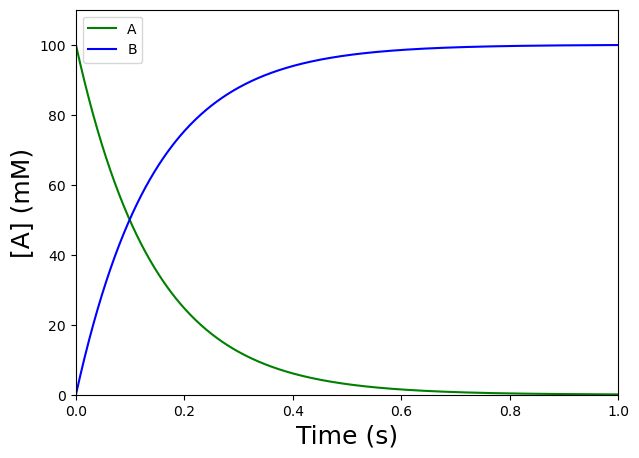

In [6]:
plt.figure(figsize=(7,5))   #to create a figure object
plt.plot(tAtoB,yAtoB[:,0],'g')   #select the first column of yAtoB, i.e. [A], and plot versus t, use green
plt.plot(tAtoB,yAtoB[:,1],'b')   #select the second column of yAtoB, i.e. [B], and plot versus t, use blue
plt.xlabel('Time (s)', fontsize=18)   #label the X-axis
plt.ylabel('[A] (mM)', fontsize=18)   #label the Y-axis
plt.xlim([0,1])   #set X-axis range
plt.ylim([0,110])   #set Y-axis range
plt.legend(['A','B'], loc='best')   #include a legend
plt.show()   #show the figure object

Nice! The curve shows the signal we can expect (whether we measure the dissappearance of A or the appearance of B) for an irreversible first-order reaction $A$ $\rightarrow$ $B$, with $k_f = 7$ $s^{-1}$ and $[A]_0 = 100$ $mM$.

```{exercise}
:label: myexample7-exercise1

How would you determine $k_f$ in the lab?
```

````{solution} myexample7-exercise1
:label: myexample7-solution1
:class: dropdown

If our reactant A absorbs light at a given wavelength (and our product B does not), then we can follow the absorbance and use the Beer-Lambert law to determine the concentration of reactant A, $[A]$, as a function of time.

A plot of $[A]$ as a function of time will decay exponentially from $[A]_0$ down to zero. We can fit our experimental data to this function

$$
[A] = [A]_0 e^{-k_{f}t} 
$$

to determine $k_{f}$.

When we take the natural logarithm of both sides, we obtain:

$$
ln ([A]) = ln ([A]_0) - k_{f} t .
$$

For an irreversible first-order reaction, a plot of $ln ([A])$ as a function of time will yield a straight line and the slope will be equal to $k_{f}$.

This is demonstrated in the following figure:

```{image} ./Images/AtoB_kf_exp_line.png
:alt: Determining the forward rate constant experimentally for irreversible first-order reaction
:width: 600px
:align: center
```
````

## __<font color=blue>$A + B$ $\rightleftharpoons$ $AB$</font>__
---

### _Background_

We now use the numerical approach to simulate the reaction profile for a __<font color=red>reversible second-order binding reaction</font>__:

$$
A + B \underset{k_{r}}{\stackrel{k_{f}}{\rightleftharpoons}} AB .
$$

Where $k_f$ and $k_r$ are rate constants for the forward and reverse reactions between $A$ and $B$. Bear in mind that $k_f$ is now a second order rate constant with units $M^{-1} s^{-1}$ since the rate of binding is dependent on both $[A]$ and $[B]$. On the other hand, the reverse rate constant $k_r$ is first order ($s^{-1}$) since it is only dependent on one component, $[AB]$.

The following differential equations, describing the rate of variation of $[A]$, $[B]$ and $[AB]$, can be derived from the binding reaction:

$$
\frac{d[A]}{dt}= -k_f [A][B] + k_r [AB] ,

\frac{d[B]}{dt}= -k_f [A][B] + k_r [AB] ,

\frac{d[AB]}{dt}= k_f [A][B] - k_r [AB] .
$$

Note that we need to include a term for the reformation of $[A]$ from $[AB]$ as the reaction is now reversible. It will make little difference to the early stages of the reaction when $[AB] = 0$ or is small, but it will determine the position of the equilibrium at longer times. Indeed, when the reaction is “complete”, and there is no change in $[A]$, $[B]$, and $[AB]$, the reaction has reached its constant equilibrium value. Be aware that there is still a flux of molecules going forwards and backwards between the $A$ and $AB$ states! This can be defined by:

$$
k_f [A]_{eq}[B]_{eq} = k_r [AB]_{eq} .
$$

Rearranging gives the equilibrium dissociation constant $K_d$:

$$
K_d = \frac{[A]_{eq} [B]_{eq}}{[AB]_{eq}}= \frac{k_r}{k_f} .
$$

There are __analytical__ solutions to $\frac{d[AB]}{dt}$ when component $B$ is in large excess compared to $A$ to give __<font color=red>pseudo first order conditions ($[B]_0 \gg [A]_0$)</font>__. Under these conditions, the reaction is simplified because $[B]$ stays practically constant and $\sim [B]_0$. Therefore, the profile appears as a single exponential ($[AB] = [AB]_{eq} (1 - e^{-k_{obs}t})$) with an apparent rate constant $k_{obs} = k_f [B]_0 + k_r$. However, if $[B]_0$ is not much larger than $[A]_0$ this approximation gradually breaks down.

```{exercise}
:label: myexample7-exercise2

Prove that $[AB] = [AB]_{eq} (1 - e^{-k_{obs}t})$ with an apparent rate constant $k_{obs} = k_f [B]_0 + k_r$ for pseudo first order conditions ($[B]_0 \gg [A]_0$).
```

````{solution} myexample7-exercise2
:label: myexample7-solution2
:class: dropdown

```{image} ./Images/AplusBtoAB_equation.png
:alt: Proof
:width: 600px
:align: center
```
````

One can also solve this set of ODEs __numerically__ using the `odeint` function of the SciPy package.

### _Simulation_

We start be defining a function that returns $\frac{d[A]}{dt}$, $\frac{d[B]}{dt}$, and $\frac{d[AB]}{dt}$. The input for our function will be a list with initial concentrations ($C = \{[A], [B], [AB]\}$, all in $\mu$$M$), time $t$ in $s$, and the rate constants $k_{f}$ (in $\mu$$M$ $s^{-1}$), and $k_{r}$ (in $s^{-1}$). 

In [7]:
def funcAandBtofromAB(C, t, kf, kr):   #create the function
    """
    Define a function for A + B -> AB 

    Args:
        C, the concentrations of A, B, and AB (float) in mol/L
        t, the time (float) in s
        kf, the forward rate constant (float) in (mol/L)/s
        kr, the reverse rate constant (float) in 1/s

    Returns:
        dC/dt, derivative values (float) in (mol/L)/s
    """
    CA = C[0] #the initial concentration of A is the first element from the list C
    CB = C[1] #the initial concentration of B is the second element from the list C
    CAB = C[2] #the initial concentration of AB is the thirs element from the list C
    
    dAdt = -kf * CA * CB + kr * CAB #rate equation for [A]
    dBdt = -kf * CA * CB + kr * CAB #rate equation for [B]
    dABdt = kf * CA * CB - kr * CAB #rate equation for [AB]
    
    return [dAdt, dBdt, dABdt]

We then provide the initial concentrations, time points, and a rate constant. We use the following parameters:
- initial concentration of $A$: $[A]_0 = 10$ $\mu$$M$
- initial concentration of $B$: $[B]_0 = 50$ $\mu$$M$
- initial concentration of $AB$: $[AB]_0 = 0$ $\mu$$M$
- rate constants: $k_f = 1$ $\mu$$M^{-1} s^{-1}$; $k_r = 10$ $s^{-1}$.
- time points: 1000 points between $0$ and $0.1 s$

In [8]:
CAandBtofromAB = [10, 50, 0]   #y0 - initial conditions

tAandBtofromAB = np.linspace(0, 0.1, 1000)   #t - time points, an array with 1000 evenly distributed elements between 0 (included) and 0.1 (included)

ksAandBtofromAB = (1, 10)   #args - rate constants

We can now solve the ODE for each time point:

In [9]:
yAandBtofromAB = odeint(funcAandBtofromAB, CAandBtofromAB, tAandBtofromAB, ksAandBtofromAB)   #solve ODE - odeint(model, y0, t, args=)
print(yAandBtofromAB)   #print the outcome

[[1.00000000e+01 5.00000000e+01 0.00000000e+00]
 [9.95012480e+00 4.99501248e+01 4.98752049e-02]
 [9.90059739e+00 4.99005974e+01 9.94026072e-02]
 ...
 [1.95837942e+00 4.19583794e+01 8.04162058e+00]
 [1.95820429e+00 4.19582043e+01 8.04179571e+00]
 [1.95803011e+00 4.19580301e+01 8.04196989e+00]]


We can now plot our traces.

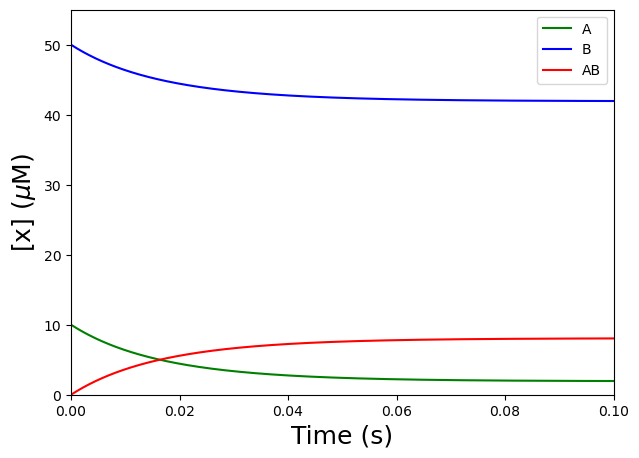

In [10]:
plt.figure(figsize=(7,5))  #to create a figure object
plt.plot(tAandBtofromAB,yAandBtofromAB[:,0],'g')   #select the first column of yAandBtofromAB, i.e. [A], and plot versus t, use green
plt.plot(tAandBtofromAB,yAandBtofromAB[:,1],'b')   #select the second column of yAandBtofromAB, i.e. [B], and plot versus t, use blue
plt.plot(tAandBtofromAB,yAandBtofromAB[:,2],'r')   #select the third column of yAandBtofromAB, i.e. [AB], and plot versus t, use red
plt.xlabel('Time (s)', fontsize=18)   #label the X-axis
plt.ylabel('[x] ($\mu$M)', fontsize=18)   #label the Y-axis
plt.xlim([0,0.1])   #set X-axis range
plt.ylim([0,55])   #set Y-axis range
plt.legend(['A','B', 'AB'], loc='best')   #include a legend
plt.show()   #show the figure object

Nice! The curve shows the signal we can expect (whether we measure the dissappearances of A or B or the appearance of AB) for a reversible second-order reaction $A + B$ $\rightleftharpoons$ $AB$, with $k_f = 1$ $\mu$$M^{-1} s^{-1}$; $k_r = 10$ $s^{-1}$; $[A]_0 = 10$ $\mu$$M$; and $[B]_0 = 50$ $\mu$$M$.

```{exercise}
:label: myexample7-exercise3

How would you determine $k_f$ and $k_r$ in the lab?
```

```{solution} myexample7-exercise3
:label: myexample7-solution3
:class: dropdown

If our product AB absorbs light at a given wavelength (and our reactants A and B do not), then we can follow the absorbance and use the Beer-Lambert law to determine the concentration of product AB, $[AB]$, as a function of time after mixing A and B.

When we use “pseudo first order conditions”, $[B]_0 \gg [A]_0$, the time course to form AB is an exponential with observed rate constant $k_{obs}$ that depends on $[B]_{0}$. Therefore, by varying $[B]_{0}$, one can evaluate $k_{f}$ and $k_{r}$ from the slope and intercept of a plot of $k_{obs}$ versus $[B]_{0}$.

More information about pre-steady state kinetics to determine rate constants can be found in
- Pollard TD, De La Cruz EM. Take advantage of time in your experiments: a guide to simple, informative kinetics assays. Mol Biol Cell. 2013;24(8):1103-1110. [doi:10.1091/mbc.E13-01-0030](https://doi.org/10.1091/mbc.e13-01-0030)
- Johnson KA. Transient state kinetic analysis of enzyme reaction pathways. Enzymes. 1992;20:1-61.[doi:10.1016/S1874-6047(08)60019-0](https://doi.org/10.1016/S1874-6047(08)60019-0)
```

## __<font color=blue>$E + S$ $\rightleftharpoons$ $ES$ $\rightarrow$ $E + P$</font>__
---

### _Background_

In the following, simple mechanism, $E$ is the enzyme, $S$ is the substrate, $ES$ is the enzyme-substrate complex, and $P$ is the product:

$$
E + S \underset{k_{-1}}{\stackrel{k_{+1}}{\rightleftharpoons}} ES \xrightarrow{\text{$k_{2}$}} E + P .
$$

Where $k_{+1}$ and $k_{−1}$ are rate constants for the forward and reverse reactions between $E$ and $S$, respectively, and $k_2$, the rate constant for the $ES \rightarrow E + P$ reaction.

We will now simulate this enzyme-catalysed reaction using a numerical approach to see how $[E]$, $[S]$, $[ES]$, and $[P]$ (in $\mu$$M$) change as a function of time. These type of curves are called progress curves. This is usually what you measure in the lab when you study enzyme reactions!

We use the following parameters:
- initial concentration of enzyme, $[E]_0 = 1$ $\mu$$M$
- initial concentration of substrate, $[S]_0 = 10$ $\mu$$M$
- initial concentration of enzyme-substrate complex, $[ES]_0 = 0$ $\mu$$M$
- initial concentration of product, $[P]_0 = 0$ $\mu$$M$
- rate constants: $k_{+1} = 1$ $\mu$$M^{-1} s^{-1}$; $k_{-1} = 0.1$ $s^{-1}$; $k_2 = 0.5$ $s^{-1}$
- time points: 10000 points between $0$ and $60 s$

### _Simulation_

```{exercise}
:label: myexample7-exercise4

It is up to you to

- Derive the differential equations, describing the rate of variation of $[E]$, $[S]$, $[ES]$, and $[P]$, from the reaction.
- Define a function that returns $\frac{d[E]}{dt}$, $\frac{d[S]}{dt}$, $\frac{d[ES]}{dt}$, and $\frac{d[P]}{dt}$.
- Provide rate constants, initial concentrations, and time points, and evaluate the function for each time point.
- Plot the resulting time traces from 0 to 60 $s$.
- Discuss the simulated data.
```

````{solution} myexample7-exercise4
:label: myexample7-solution4
:class: dropdown

- Derive the differential equations, describing the rate of variation of $[E]$, $[S]$, $[ES]$, and $[P]$, from the reaction.

$$
\frac{d [E]}{d t} = - k_{+1} [E] [S] + (k_{-1} + k_{2}) [ES] ,

\frac{d [S]}{d t} = - k_{+1} [E] [S] + k_{-1} [ES] ,

\frac{d [ES]}{d t} = k_{+1} [E] [S] - (k_{-1} + k_{2}) [ES] ,

\frac{d [P]}{d t} = k_{2} [ES] .
$$

- Define a function that returns $\frac{d[E]}{dt}$, $\frac{d[S]}{dt}$, $\frac{d[ES]}{dt}$, and $\frac{d[P]}{dt}$. Here, I used $k_{+1} = k1$; $k_{-1} = k2$; $k_2 = k3$.

```{code-block} python
#model - function that returns dE/dt, dS/dt, dES/dt, and dP/dt
def funcEandStofromEStoP(C, t, k1, k2, k3) :
    # constants
    CE = C[0]
    CS = C[1]
    CES = C[2]
    CP = C[3]
    
    # equations
    dEdt = -k1 * CE * CS + (k2 + k3) * CES
    dSdt = -k1 * CE * CS + k2 * CES
    dESdt = k1 * CE * CS - (k2 + k3) * CES
    dPdt = k3 * CES
    
    return [dEdt, dSdt, dESdt, dPdt]
```

- Provide rate constants, initial concentrations, and time points, and evaluate the function for each time point.

```{code-block} python
#y0 - initial conditions
CEandStofromEStoP = [1, 10, 0, 0]

#t - time points
tEandStofromEStoP = np.linspace(0, 60, 10000)

#args - rate constants
ksEandStofromEStoP = (1, 0.1, 0.5)

#solve ODE - odeint(model, y0, t, args=)
yEandStofromEStoP = odeint(funcEandStofromEStoP, CEandStofromEStoP, tEandStofromEStoP, ksEandStofromEStoP)
print(yEandStofromEStoP)
```

- Plot the resulting time traces from 0 to 60 $s$.

```{code-block} python
#create plot
plt.figure(figsize=(7,5))
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,0],'g:') #select the first column of yEandStofromEStoP, i.e. [E], and plot versus t, use green
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,1],'b-') #select the second column of yEandStofromEStoP, i.e. [S], and plot versus t, use blue
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,2],'r--') #select the third column of yEandStofromEStoP, i.e. [ES], and plot versus t, use red
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,3],'y-.') #select the fourth column of yEandStofromEStoP, i.e. [P], and plot versus t, use yellow
plt.xlabel('Time (s)', fontsize=18) #label the X-axis
plt.ylabel('[x] ($\mu$M)', fontsize=18) #label the Y-axis
plt.xlim([0,60]) #set X-axis range
plt.ylim([0,11]) #set Y-axis range
plt.legend(['E','S', 'ES', 'P'], loc='best') #include a legend
plt.show()
```
- Discuss the simulated data.

__Note__ that the reaction velocity or rate (_i.e._, the slope of the $[P]$ versus $t$ curve ($= \frac{d[P]}{dt} = -\frac{d[S]}{dt}$) decreases in time due to _e.g._ substrate depletion. Only early in the progress curve, product formation is linear with time. If we determine the initial reaction rate ($v_0$) from the slope of the curve during this early phase, we circumvent substrate depletion.

__Note__ the three phases:
- pre-steady state, with a burst in $[ES]$
- steady state, with almost constant $[ES]$, and
- end, where $[ES]$ drops.
Let us analyse these three phases in detail in the following exercise.

````

### _Pre-steady state and steady state phases_

```{exercise}
:label: myexample7-exercise5

Let’s analyse $[E]$ and $[ES]$ versus $t$ in more detail. When we analyze the data from the previous exercise, we can distinguish three different phases. Change the X- and Y-axis formats of the plot from the previous exercise to zoom in on these three phases: 
1. __<font color=red>The pre-steady state (or transient) phase</font>__, in which there is a burst in $[ES]$. In this case between 0 and ~ 0.5 $s$.
2. __<font color=red>The steady state phase</font>__, in which $[ES]$ remains almost constant. Here, between 0.5 and ~ 10 $s$.
3. After ~ 10 $s$, $[ES]$ drops and there is a progressively nonlinear formation of product.

```

````{solution} myexample7-exercise5
:label: myexample7-solution5
:class: dropdown

1. __<font color=red>The pre-steady state (or transient) phase</font>__, in which there is a burst in $[ES]$. In this case between 0 and ~ 0.5 $s$.

```{code-block} python
#create plot for [E] and [S] from 0 to 0.5 s
plt.figure(figsize=(7,5))
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,0],'g:') #select the first column of yEandStofromEStoP, i.e. [E], and plot versus t, use green
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,2],'r--') #select the third column of yEandStofromEStoP, i.e. [ES], and plot versus t, use red
plt.xlabel('Time (s)', fontsize=18) #label the X-axis
plt.ylabel('[x] ($\mu$M)', fontsize=18) #label the Y-axis
plt.xlim([0,0.5]) #set X-axis range
plt.ylim([0,1.1]) #set Y-axis range
plt.legend(['E','ES'], loc='best') #include a legend
plt.show()
```

2. __<font color=red>The steady state phase</font>__, in which $[ES]$ remains almost constant. Here, between 0.5 and ~ 10 $s$.

```{code-block} python
#create plot for [E] and [S] from 0.5 to 10 s
plt.figure(figsize=(7,5))
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,0],'g:') #select the first column of yEandStofromEStoP, i.e. [E], and plot versus t, use green
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,2],'r--') #select the third column of yEandStofromEStoP, i.e. [ES], and plot versus t, use red
plt.xlabel('Time (s)', fontsize=18) #label the X-axis
plt.ylabel('[x] ($\mu$M)', fontsize=18) #label the Y-axis
plt.xlim([0.5,10]) #set X-axis range
plt.ylim([0,1.1]) #set Y-axis range
plt.legend(['E', 'ES'], loc='best') #include a legend
plt.show()
```

3. After ~ 10 $s$, $[ES]$ drops and there is a progressively nonlinear formation of product.

```{code-block} python
#create plot for [E] and [S] from 0 to 60 s
plt.figure(figsize=(7,5))
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,0],'g:') #select the first column of yEandStofromEStoP, i.e. [E], and plot versus t, use green
plt.plot(tEandStofromEStoP,yEandStofromEStoP[:,2],'r--') #select the third column of yEandStofromEStoP, i.e. [ES], and plot versus t, use red
plt.xlabel('Time (s)', fontsize=18) #label the X-axis
plt.ylabel('[x] ($\mu$M)', fontsize=18) #label the Y-axis
plt.xlim([0,60]) #set X-axis range
plt.ylim([0,1.1]) #set Y-axis range
plt.legend(['E','ES'], loc='best') #include a legend
plt.show()
```

````

### _Experimental design: $[S]_0$ relative to $[E]_0$_

```{exercise}
:label: myexample7-exercise6

Let’s further investigate what effect changing the value of $[S]_0$ relative to $[E]_0$ has for the same, simple reaction mechanism.
- Compare $[S]_{0,1} = 10$ $\mu$$M$ and $[S]_{0,2} = 1$ $\mu$$M$ for $k_{+1,1} = k_{+1,2} = 1$ $\mu$$M^{-1} s^{-1}$; $k_{-1,1} = k_{-1,2} = 0.1$ $s^{-1}$; $k_{2,1} = k_{2,2} = 0.5$ $s^{-1}$, $[ES]_{0,1} = [ES]_{0,2} = 0$ $\mu$$M$, $[P]_{0,1} = [P]_{0,2} = 0$ $\mu$$M$, and $[E]_{0,1} = [E]_{0,2} = 1$ $\mu$$M$. We can see that the initial reaction rate decreases and that $[ES]$ decreases rapidly for $[S]_{0,2}$. There is only enough substrate for a single turnover. Where does each curve reach a plateau?
- Next, compare $[E]_{0,1} = 1$ $\mu$$M$ and $[E]_{0,2} = 0.1$ $\mu$$M$ for $k_{+1,1} = k_{+1,2} = 1$ $\mu$$M^{-1} s^{-1}$; $k_{-1,1} = k_{-1,2} = 0.1$ $s^{-1}$; $k_{2,1} = k_{2,2} = 0.5$ $s^{-1}$, $[ES]_{0,1} = [ES]_{0,2} = 0$ $\mu$$M$, $[P]_{0,1} = [P]_{0,2} = 0$ $\mu$$M$, and $[S]_{0,1} = [S]_{0,2} = 10$ $\mu$$M$. We can see that the duration of the steady-state phase increases for $[E]_{0,2}$. The enzyme undergoes multiple rounds of catalysis without depleting the substrate. When we study steady-state kinetics, conditions are chosen so that $[S]_0 \gg [E]_0$.
```

````{solution} myexample7-exercise6
:label: myexample7-solution6
:class: dropdown

- Compare $[S]_{0,1} = 10$ $\mu$$M$ and $[S]_{0,2} = 1$ $\mu$$M$ for $k_{+1,1} = k_{+1,2} = 1$ $\mu$$M^{-1} s^{-1}$; $k_{-1,1} = k_{-1,2} = 0.1$ $s^{-1}$; $k_{2,1} = k_{2,2} = 0.5$ $s^{-1}$, $[ES]_{0,1} = [ES]_{0,2} = 0$ $\mu$$M$, $[P]_{0,1} = [P]_{0,2} = 0$ $\mu$$M$, and $[E]_{0,1} = [E]_{0,2} = 1$ $\mu$$M$. We can see that the initial reaction rate decreases and that $[ES]$ decreases rapidly for $[S]_{0,2}$. There is only enough substrate for a single turnover. Where does each curve reach a plateau?

```{code-block} python
CEandStofromEStoP_1 = [1, 10, 0, 0]
CEandStofromEStoP_2 = [1, 1, 0, 0]

yEandStofromEStoP_1 = odeint(funcEandStofromEStoP, CEandStofromEStoP_1, tEandStofromEStoP, ksEandStofromEStoP)
yEandStofromEStoP_2 = odeint(funcEandStofromEStoP, CEandStofromEStoP_2, tEandStofromEStoP, ksEandStofromEStoP)

plt.figure(figsize=(7,5))
plt.plot(tEandStofromEStoP,yEandStofromEStoP_1[:,2],'g:') #select the third column of yEandStofromEStoP, i.e. [ES], and plot versus t, use red
plt.plot(tEandStofromEStoP,yEandStofromEStoP_2[:,2],'r--') #select the third column of yEandStofromEStoP, i.e. [ES], and plot versus t, use red
plt.xlabel('Time (s)', fontsize=18) #label the X-axis
plt.ylabel('[ES] ($\mu$M)', fontsize=18) #label the Y-axis
plt.xlim([0,30]) #set X-axis range
plt.ylim([0,1.1]) #set Y-axis range
plt.legend(['[S] = 10 $\mu$M','[S] = 1 $\mu$M'], loc='best') #include a legend
plt.show()

plt.figure(figsize=(7,5))
plt.plot(tEandStofromEStoP,yEandStofromEStoP_1[:,3],'g:') #select the fourth column of yAandBtofromAB, i.e. [P], and plot versus t, use green
plt.plot(tEandStofromEStoP,yEandStofromEStoP_2[:,3],'r--') #select the fourth column of yAandBtofromAB, i.e. [P], and plot versus t, use red
plt.xlabel('Time (s)', fontsize=18) #label the X-axis
plt.ylabel('[P] ($\mu$M)', fontsize=18) #label the Y-axis
plt.xlim([0,30]) #set X-axis range
plt.ylim([0,11]) #set Y-axis range
plt.legend(['[S] = 10 $\mu$M','[S] = 1 $\mu$M'], loc='best') #include a legend
plt.show()
```

In the first graph ($[ES]$ versus $t$), we see that $[ES]$ decreases rapidly when $[E]_0 ≈ [S]_0 = 1$ $\mu$$M$. This is called a single turnover experiment.

In the second graph, ($[P]$ versus $t$), we see that $[P]_∞ = [S]_0$.

- Next, compare $[E]_{0,1} = 1$ $\mu$$M$ and $[E]_{0,2} = 0.1$ $\mu$$M$ for $k_{+1,1} = k_{+1,2} = 1$ $\mu$$M^{-1} s^{-1}$; $k_{-1,1} = k_{-1,2} = 0.1$ $s^{-1}$; $k_{2,1} = k_{2,2} = 0.5$ $s^{-1}$, $[ES]_{0,1} = [ES]_{0,2} = 0$ $\mu$$M$, $[P]_{0,1} = [P]_{0,2} = 0$ $\mu$$M$, and $[S]_{0,1} = [S]_{0,2} = 10$ $\mu$$M$. We can see that the duration of the steady-state phase increases for $[E]_{0,2}$. The enzyme undergoes multiple rounds of catalysis without depleting the substrate. When we study steady-state kinetics, conditions are chosen so that $[S]_0 \gg [E]_0$.

```{code-block} python
CEandStofromEStoP_3 = [1, 10, 0, 0]
CEandStofromEStoP_4 = [0.1, 10, 0, 0]

yEandStofromEStoP_3 = odeint(funcEandStofromEStoP, CEandStofromEStoP_3, tEandStofromEStoP, ksEandStofromEStoP)
yEandStofromEStoP_4 = odeint(funcEandStofromEStoP, CEandStofromEStoP_4, tEandStofromEStoP, ksEandStofromEStoP)

plt.figure(figsize=(7,5))
plt.plot(tEandStofromEStoP,yEandStofromEStoP_3[:,2],'g:') #select the third column of yEandStofromEStoP, i.e. [ES], and plot versus t, use red
plt.plot(tEandStofromEStoP,yEandStofromEStoP_4[:,2],'r--') #select the third column of yEandStofromEStoP, i.e. [ES], and plot versus t, use red
plt.xlabel('Time (s)', fontsize=18) #label the X-axis
plt.ylabel('[ES] ($\mu$M)', fontsize=18) #label the Y-axis
plt.xlim([0,30]) #set X-axis range
plt.ylim([0,1.1]) #set Y-axis range
plt.legend(['[S] = 1 $\mu$M','[S] = 0.1 $\mu$M'], loc='best') #include a legend
plt.show()

plt.figure(figsize=(7,5))
plt.plot(tEandStofromEStoP,yEandStofromEStoP_3[:,3],'g:') #select the fourth column of yAandBtofromAB, i.e. [P], and plot versus t, use green
plt.plot(tEandStofromEStoP,yEandStofromEStoP_4[:,3],'r--') #select the fourth column of yAandBtofromAB, i.e. [P], and plot versus t, use red
plt.xlabel('Time (s)', fontsize=18) #label the X-axis
plt.ylabel('[P] ($\mu$M)', fontsize=18) #label the Y-axis
plt.xlim([0,30]) #set X-axis range
plt.ylim([0,11]) #set Y-axis range
plt.legend(['[S] = 1 $\mu$M','[S] = 0.1 $\mu$M'], loc='best') #include a legend
plt.show()
```

From the first ($[ES]$ versus $t$) and second ($[P]$ versus $t$) graphs, we see that when $[E]_0 = 0.1$ $\mu$$M$ << $[S]_0 = 10$ $\mu$$M$, we have a much longer steady-state phase.
````

### _Cytochrome c_

Think about a possible mechanism for cytochrome c peroxidase activity. Don't forget that native cytochrome c needs to be activated to become a more active peroxidase and that cytochrome c peroxidase can become deactivated as well! Which parameters do you need to be able to simulate the reaction?

There is no right answer here! For examples of possible mechanisms for cytochrome c peroxidase activity, see
- Parakra RD , Kleffmann T , Jameson GNL , Ledgerwood EC . The proportion of Met80-sulfoxide dictates peroxidase activity of human cytochrome c. Dalton Trans. 2018;47(27):9128-9135. [doi:10.1039/c8dt02185f](https://pubs.rsc.org/en/content/articlelanding/2018/DT/C8DT02185F)
- Yin V, Shaw GS, Konermann L. Cytochrome c as a Peroxidase: Activation of the Precatalytic Native State by H2O2-Induced Covalent Modifications. J Am Chem Soc. 2017;139(44):15701-15709. [doi:10.1021/jacs.7b07106](https://pubs.acs.org/doi/10.1021/jacs.7b07106)